# ANALISIS VITAMINA D PRE Y DURANTE PANDEMIA EN PACIENTES SANOS SOBRE MUESTRAS REALIZADAS ENTRE 2018 Y 2021 DESDE ARICA A PUERTO MONTT.

### La vitamina D es un importante regulador del equilibrio del calcio. Además, tiene efectos importantes sobre el sistema inmunitario, induce péptidos antimicrobianos en las superficies mucosas y estudios observacionales anteriores a la pandemia habían encontrado una asociación entre los niveles bajos de este nutriente y un mayor riesgo de infecciones del tracto respiratorio.
### Con las medidas de restricción a la circulación que rigieron durante todo 2020 más parte de 2021, y la imposibilidad de las personas de pasar tiempo al aire libre, los valores de vitamina D eran deficientes en la mayoría de la población.

### En este trabajo buscaremos probar la hipótesis de que la falta de exposición solar provocó un decenso de los niveles totales de Vitamina D en toda la población. Lo que se debiera encontrar acentuado en personas con residencia en el sur, además de estar influido por la estación del año en la que se mida.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import plotly
import plotly.graph_objs as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots

from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA

import warnings
warnings.filterwarnings('ignore')

#data = pd.read_csv("DATOS ADD_VISUALIZACION.CSV", decimal=',')
#data = pd.read_csv('../Visualización/Vitamina_D_Visualizacion_26092022.csv', sep=';', decimal=',')
data = pd.read_csv("https://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv",sep=';', decimal=',')
#datahttps://raw.githubusercontent.com/wilderhp/VitaminaD/main/Vitamina_D_Visualizacion_26092022.csv

In [4]:
data.columns = data.columns.str.upper()
data.head(5)

,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN


In [5]:
#data = data[data['VITAMINA D']!='2.402.000.203']
#data = data[data['VITAMINA D']!='2.920.002.027']
#data = data[data['VITAMINA D']!='2.567.000.204']
data['VITAMINA D'] = data['VITAMINA D'].astype(float)

In [6]:
# Para definir los resultados de la vitamina en base a la tabla en https://tucuerpomehabla.com/la-vitamina-d-clave-en-nuestro-bienestar/
def condicion(x):
    x=int(x)
    if x<30:
        return "Insuficiente"
    else:
        return "Deseable"
    

def retornarMes(x):
    return mesesDic[str(x)]


data['RESULTADO_VAL']= 1

data['VIT_D_TXT'] = data['VITAMINA D'].apply(condicion)
data


,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,VITAMINA D,FOSFORO,CALCIO,CREATININA,COVID-19,RESULTADO_VAL,VIT_D_TXT
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,22.87,5.5,10.9,0.90,NaN,1,Insuficiente
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,15.04,NaN,NaN,NaN,NaN,1,Insuficiente
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,17.17,4.1,9.6,0.80,NaN,1,Insuficiente
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,14.44,4.3,9.6,0.60,NaN,1,Insuficiente
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,15.52,NaN,NaN,0.66,NaN,1,Insuficiente
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212521,31/12/2021 12:20,2021,SANTIAGO,6583559,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,41,6.62,NaN,NaN,NaN,NaN,1,Insuficiente
212522,31/12/2021 12:35,2021,SANTIAGO,6583737,"1,18E+12",F,Adulto,CENTRO,PRIMAVERA,63,14.53,NaN,NaN,NaN,NaN,1,Insuficiente
212523,31/12/2021 13:01,2021,SANTIAGO,6583960,"1,13E+13",M,Niño,CENTRO,PRIMAVERA,1,6.61,5.9,9.7,0.31,NaN,1,Insuficiente
212524,31/12/2021 13:17,2021,SANTIAGO,6584013,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,45,18.50,NaN,NaN,NaN,NaN,1,Insuficiente


### Primero revisamos cuál es la unidad de análisis. Cada Petición corresponde a un exámen tomado a un paciente X.

In [7]:
data['IDENTIFICADOR'].value_counts()

1,12E+13             92977
1,11E+13             59086
1,19E+12             10702
1,17E+12             10110
1,18E+12              9585
                     ...  
11EX235401398796         1
11IND353273935619        1
11EX235196396857         1
11EX235379395159         1
11EX235468396709         1
Name: IDENTIFICADOR, Length: 391, dtype: int64

In [8]:
data['PETICION'].value_counts()

2208168    1
3645272    1
5029692    1
2588484    1
3632966    1
          ..
3808789    1
2754070    1
2260505    1
4347420    1
4313929    1
Name: PETICION, Length: 212526, dtype: int64

In [9]:
data['LABORATORIO'].unique()

array([' SANTIAGO', ' LA SERENA', ' VALDIVIA', ' ANTOFAGASTA',
       ' PUERTO MONTT', ' ILLAPEL', ' RANCAGUA', ' CONCEPCION', ' OVALLE',
       ' LOS ANDES', ' VIÑA DEL MAR', ' VALLENAR', ' TEMUCO', ' COPIAPO',
       ' ARICA', ' CALAMA', ' IQUIQUE', 'TALCA'], dtype=object)

### Las variables categóricas también son útiles para predecir resultados, por este motivo se hará un mapeo de las variables que se consideran relevantes para el modelo.
### La variable que se quiere predecir es el resultado de un examen bajo ciertas condiciones externas a las que se enfrentan los pacientes y que influyen en la concentración de Vitamina D

In [10]:

data['rango_edad'] = data['ADULTO_NIÑO'].map({'Adulto': 1, 'Niño': 0})
data['estación'] = data['ESTACIONES_AÑO'].map({'INVIERNO': 0, 'OTOÑO': 1, 'PRIMAVERA': 2, 'VERANO': 3  })
data['region_lab']= data['LABORATORIO'].map({
   ' SANTIAGO': 13,
   ' LA SERENA':4,
   ' VALDIVIA': 14,
   ' ANTOFAGASTA': 2,
   ' PUERTO MONTT': 10,
   ' ILLAPEL':4,
   ' RANCAGUA':6,
   ' CONCEPCION': 8,
   ' OVALLE':4,
   ' LOS ANDES': 5,
   ' VIÑA DEL MAR':5,
   ' VALLENAR':3,
   ' TEMUCO':9,
   ' COPIAPO':3,
   ' ARICA':15,
   ' CALAMA':2, 
   ' IQUIQUE':1,
   'TALCA': 7
})

In [11]:
data['resultado']= data['VIT_D_TXT'].map({'Deseable': 1, 'Insuficiente': 0})

### Se crearon nuevas variables numéricas denominadas: rango_edad, estación, macro_zona y region_lab. Todas estas variables se consiedaran relevantes puesto que la mayoría de los estudios científicos avalan que la exposicón al sol es relevante en los indicadores de Vitamina D.

In [12]:
data

,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,...,FOSFORO,CALCIO,CREATININA,COVID-19,RESULTADO_VAL,VIT_D_TXT,rango_edad,estación,region_lab,resultado
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,...,5.5,10.9,0.90,NaN,1,Insuficiente,0,3,13,0
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,3,13,0
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,...,4.1,9.6,0.80,NaN,1,Insuficiente,1,3,13,0
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,...,4.3,9.6,0.60,NaN,1,Insuficiente,1,3,13,0
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,...,NaN,NaN,0.66,NaN,1,Insuficiente,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212521,31/12/2021 12:20,2021,SANTIAGO,6583559,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,41,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0
212522,31/12/2021 12:35,2021,SANTIAGO,6583737,"1,18E+12",F,Adulto,CENTRO,PRIMAVERA,63,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0
212523,31/12/2021 13:01,2021,SANTIAGO,6583960,"1,13E+13",M,Niño,CENTRO,PRIMAVERA,1,...,5.9,9.7,0.31,NaN,1,Insuficiente,0,2,13,0
212524,31/12/2021 13:17,2021,SANTIAGO,6584013,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,45,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0


In [13]:
data['resultado'].value_counts()

0    178921
1     33605
Name: resultado, dtype: int64

### Los resultados de los exámenes muestran que de las 212526 muestras tomadas un 84.18% arrojan resultados insuficientes de Vitamina D.

### Análisis de la distribución de las variables numéricas

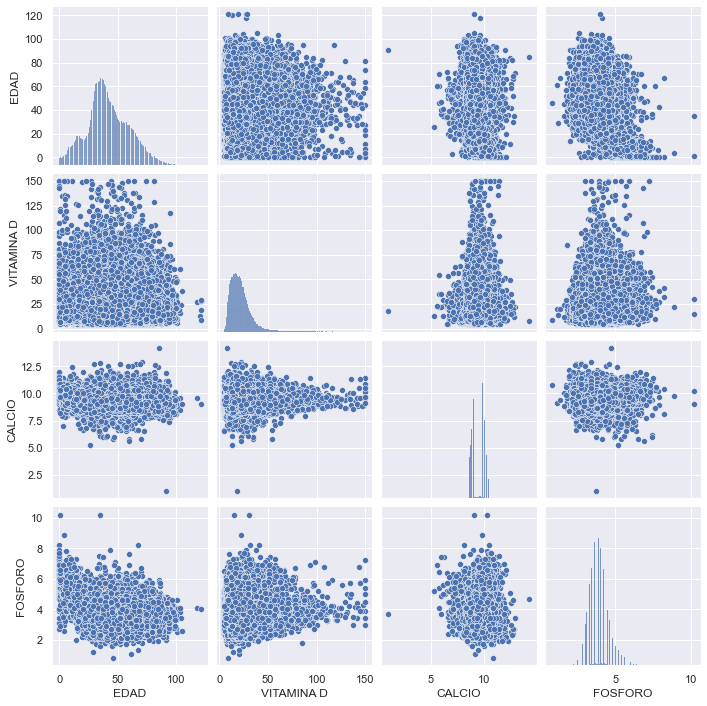

In [14]:
sns.set()
cols = ['EDAD','VITAMINA D','CALCIO','FOSFORO']
sns.pairplot(data[cols], size = 2.5)
plt.show();

### Análisis de correlación entre las variables numericas de Edad, VItamina D Calcio y Fósforo

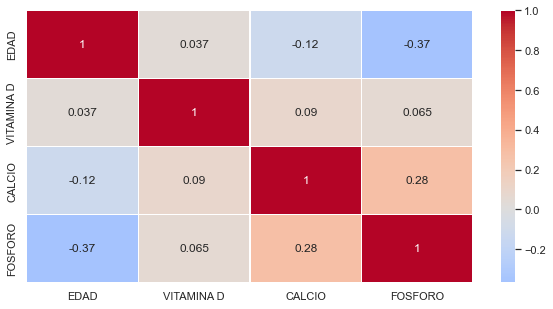

In [16]:
cols = ['EDAD','VITAMINA D','CALCIO','FOSFORO']

data_selec=data[cols]
plt.figure(figsize=(10,5))
sns.heatmap(data_selec.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.show()

In [18]:
### Distribución de las variables como Edad, Calcio y Fósforo con respecto a la Vitamina D

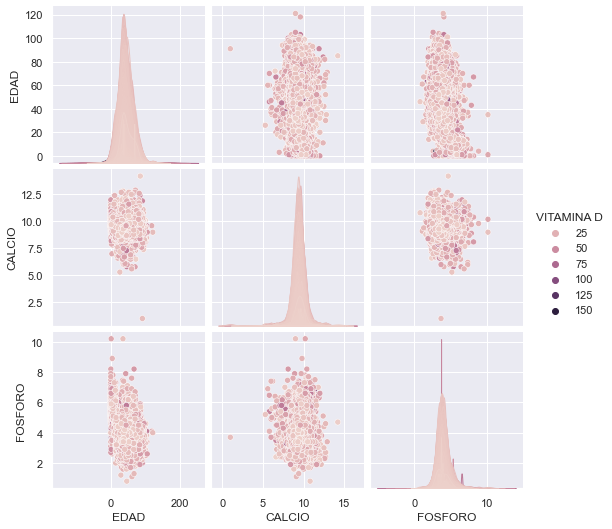

In [17]:
sns.pairplot(data_selec, hue="VITAMINA D")
plt.show()

### Comportamiento de la Vitamina D con el Calcio y Fósforo durante los años pre y durante pandemia

In [21]:
VitD_Ca=data[['AÑO','VITAMINA D','CALCIO', 'FOSFORO']]
VitD_Ca=VitD_Ca.groupby(['AÑO']).agg({'VITAMINA D':'mean','CALCIO':'mean','FOSFORO':'mean'})
VitD_Ca=VitD_Ca.reset_index()
VitD_Ca

,AÑO,VITAMINA D,CALCIO,FOSFORO
0,2018,20.861393,9.631929,4.051145
1,2019,23.515718,9.666053,4.050896
2,2020,22.032825,9.320467,3.877068
3,2021,20.450111,9.285490,3.813380


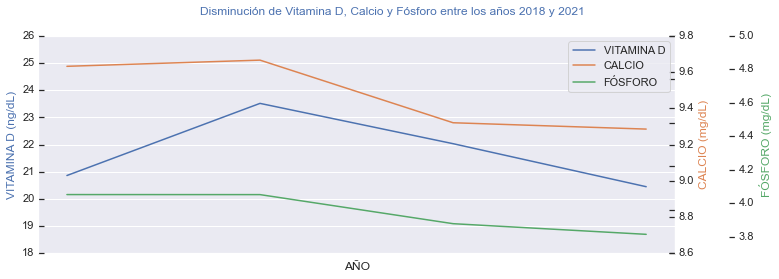

In [29]:
#from mpl_toolkits.axes_grid1 import host_subplot
#import mpl_toolkits.axisartist as AA
#import matplotlib.pyplot as plt
#fig,ax1=plt.subplots(figsize=(18,10))

host = host_subplot(111, axes_class=AA.Axes)
plt.subplots_adjust(right=1.6)
fontsize=14

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()

offset = 60
new_fixed_axis = par2.get_grid_helper().new_fixed_axis
par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
                                        offset=(offset, 0))

par2.axis["right"].toggle(all=True)
par1.axis["right"].toggle(all=True)

#host.set_xlim(-0.5,3.5)
host.set_ylim(18, 26, 4)

host.set_xlabel("AÑO")
host.set_ylabel("VITAMINA D (ng/dL)")
par1.set_ylabel("CALCIO (mg/dL)")
par2.set_ylabel("FÓSFORO (mg/dL)")

p1, = host.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["VITAMINA D"].tolist(), label="VITAMINA D")
p2, = par1.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["CALCIO"].tolist(), label="CALCIO")
p3, = par2.plot(VitD_Ca["AÑO"].tolist(),VitD_Ca["FOSFORO"].tolist(), label="FÓSFORO")


lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

#par2.spines['right'].set_position(('outward', 40))


par2.xaxis.set_ticks([])

#host.axis.label.set_color(p1.get_color())
#par1.axis.label.set_color(p2.get_color())
#par2.axis.label.set_color(p3.get_color())


par1.set_ylim(8.6, 9.8)
par2.set_ylim(3.7, 5)



host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right"].label.set_color(p3.get_color())
host.spines['top'].set_visible(False)
host.legend()
plt.suptitle("Disminución de Vitamina D, Calcio y Fósforo entre los años 2018 y 2021 ",
             horizontalalignment = 'left', fontsize=12, color ='b')
             #3x=1,
             #y=2)
             #transform=fig.transFigure)
plt.draw()
fig.tight_layout()
plt.show()

#plt.savefig("Test")

####  Se observa que el descenso de la vitamina D durante los años del 2018 al 2021 estuvo acompañado también de una disminución en la concentración Calcio y Fósforo 

In [12]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

## I. Análisis de las variables usando Regresión Múltiple

## Estaciónes del año
### Primero se revisará cómo se comporta la concentración de Vitamina D en la población a medida que pasa de invierno a verano.

In [13]:
mod = smf.ols(formula='resultado ~ estación', data=data)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3440.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:30:15   Log-Likelihood:                -85575.
No. Observations:              212526   AIC:                         1.712e+05
Df Residuals:                  212524   BIC:                         1.712e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0964      0.001     73.366      0.0

In [14]:
params = res.params
print(params)

Intercept    0.096361
estación     0.041359
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de la estación')

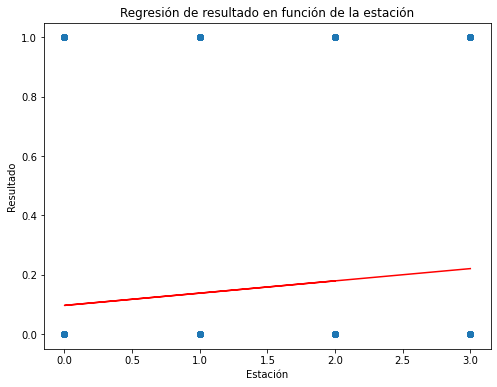

In [15]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['estación'], data['resultado'], "o", label="Data")
ax.plot(data['estación'], params['Intercept']+params['estación']*data['estación']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("Estación")
ax.set_title("Regresión de resultado en función de la estación")

### A medida que la estación se acerca al verano la concentración de Vitamina D aumenta a nivel agregado de la población.

## Rango edad
### Se analiza cómo se comporta la Vitamina D en adultos y niños.

In [16]:
mod2 = smf.ols(formula='resultado ~ rango_edad', data=data)  
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     15.18
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           9.75e-05
Time:                        21:30:17   Log-Likelihood:                -87273.
No. Observations:              212526   AIC:                         1.746e+05
Df Residuals:                  212524   BIC:                         1.746e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1682      0.003     62.349      0.0

### Al analizar cómo se comporta la Vitamina D con respecto al rango de edad arroja un R2 de 0. Esto indica que el modelo no explica ninguna porción de la variabilidad de los datos de respuesta en torno a la media de rango de edad.

In [17]:
params2 = res2.params
print(params2)

Intercept     0.168170
rango_edad   -0.010994
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de rango_edad')

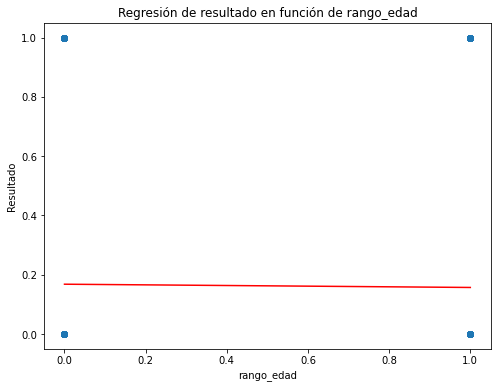

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['rango_edad'], data['resultado'], "o", label="Data")
ax.plot(data['rango_edad'], params2['Intercept']+params2['rango_edad']*data['rango_edad']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("rango_edad")
ax.set_title("Regresión de resultado en función de rango_edad")

## Sexo del paciente

In [19]:
mod1 = smf.ols(formula='resultado ~ SEXO', data=data)
res1 = mod1.fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     64.43
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.00e-15
Time:                        21:30:18   Log-Likelihood:                -87249.
No. Observations:              212526   AIC:                         1.745e+05
Df Residuals:                  212524   BIC:                         1.745e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1621      0.001    173.635      0.0

In [20]:
params1 = res1.params
print(params1)

Intercept    0.162098
SEXO[T.M]   -0.014124
dtype: float64


### El sexo del paciente tampoco influye notablemente en los resultados de las muestras de Vitamina D.

## Regiones desde Arica a Puerto Montt, dada por la variable Laboratorio

### Comparamos el resultado con la variable Laboratorio que equivale a la región en que es tomada la Vitamina D.

In [21]:
mod3 = smf.ols(formula='resultado ~ LABORATORIO', data=data)
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     39.48
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          1.92e-131
Time:                        21:30:20   Log-Likelihood:                -86946.
No. Observations:              212526   AIC:                         1.739e+05
Df Residuals:                  212508   BIC:                         1.741e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [22]:
data['LABORATORIO'].value_counts()

 SANTIAGO        136312
 CONCEPCION       13528
 PUERTO MONTT      9277
 LA SERENA         8787
 VALDIVIA          7737
 TEMUCO            5883
 ANTOFAGASTA       5031
 VIÑA DEL MAR      4289
 RANCAGUA          4000
TALCA              3832
 ARICA             3595
 COPIAPO           2483
 LOS ANDES         1777
 OVALLE            1761
 ILLAPEL           1749
 VALLENAR          1151
 IQUIQUE            925
 CALAMA             409
Name: LABORATORIO, dtype: int64

### La categoría base que toma es Antofagasta, por defecto usa orden alfabético. Si buscamos el laboratorio con mayor frecuencia encontramos que es Santiago, como era de esperarse.

### Cambiemos la categoría base por la categoría con mayor frecuencia. Para ello, podemos cambiar el tipo de variable en pandas, o indicar la categoría base al correr el modelo, en este caso se indicará "13" que equivale a "SANTIAGO". Se usará también la variable dummies creada como region_lab en donde a cada Laboratorio se le asignó el número de región al que pertenece.

In [23]:
mod3a = smf.ols(formula='resultado ~ C(region_lab, Treatment(reference = 13))', data=data)
res3a = mod3a.fit()
print(res3a.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     53.35
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          4.39e-129
Time:                        21:30:21   Log-Likelihood:                -86961.
No. Observations:              212526   AIC:                         1.739e+05
Df Residuals:                  212513   BIC:                         1.741e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [24]:
data['LABORATORIO'] = pd.Categorical(data['LABORATORIO'], categories=data['LABORATORIO'].unique())

In [25]:
data['LABORATORIO'].describe()

count        212526
unique           18
top        SANTIAGO
freq         136312
Name: LABORATORIO, dtype: object

### Revisamos como queda el modelo categorizado por Santiago

In [26]:
mod3b = smf.ols(formula='resultado ~ region_lab', data=data)
res3b = mod3b.fit()
print(res3b.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     192.9
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           7.67e-44
Time:                        21:30:21   Log-Likelihood:                -87185.
No. Observations:              212526   AIC:                         1.744e+05
Df Residuals:                  212524   BIC:                         1.744e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1233      0.003     46.975      0.0

In [27]:
params3b = res3b.params
print(params3b)

Intercept     0.123346
region_lab    0.003157
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de region_lab')

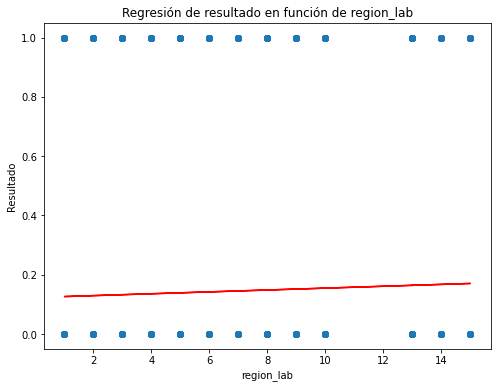

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['region_lab'], data['resultado'], "o", label="Data")
ax.plot(data['region_lab'], params3b['Intercept']+params3b['region_lab']*data['region_lab']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("region_lab")
ax.set_title("Regresión de resultado en función de region_lab")

# *** Acá se debiera ordenar las regiones en el eje X de norte a sur** ver cómo se hace eso en el gráfico

## Año en que se toma la muestra de Vitamina D

### Revisando cómo se comporta el resultado con respecto a los años en que fueron tomadas las muestras de Vitamina D. Se espera que la concentración de Vitamina D baje desde el 2018 al 2021, considerando que el encierro producto de la pandemia provocó mayor deficiencia de esta vitamina.

### Se espera encontrar un coeficiente de correlación negativo entre Resultado y año, producto de las cuarentenas realizadas en el país en período de pandemia.

In [29]:
mod4 = smf.ols(formula='resultado ~ AÑO', data=data)
res4 = mod4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     594.6
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          3.85e-131
Time:                        21:30:22   Log-Likelihood:                -86984.
No. Observations:              212526   AIC:                         1.740e+05
Df Residuals:                  212524   BIC:                         1.740e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0793      1.473     24.491      0.0

In [30]:
params4 = res4.params
print(params4)

Intercept    36.079258
AÑO          -0.017783
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de AÑO')

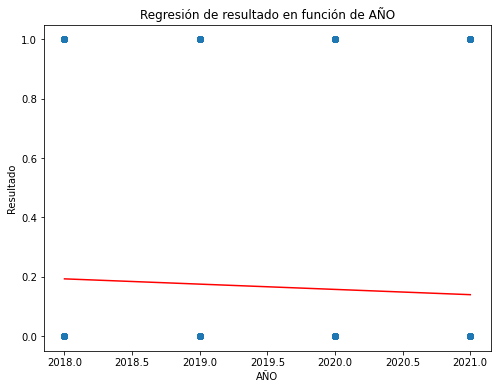

In [31]:

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data['AÑO'], data['resultado'], "o", label="Data")
ax.plot(data['AÑO'], params4['Intercept']+params4['AÑO']*data['AÑO']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("AÑO")
ax.set_title("Regresión de resultado en función de AÑO")

### El gráfico muestra como fue disminuyendo la concentración de Vitamina D medida en la población entre 2018 y 2021 por la baja exposición solar que hubo producto de las cuarentenas.

## Fosforo y Calcio
### Bajos niveles de Vitamina D están a asociados a bajos niveles de Fósforo y Calcio, por este motivo se revisará el comportamiento de estas variables con respecto al resultado de Vitamina D en la población. 

In [32]:
data

,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,...,FOSFORO,CALCIO,CREATININA,COVID-19,RESULTADO_VAL,VIT_D_TXT,rango_edad,estación,region_lab,resultado
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,...,5.5,10.9,0.90,NaN,1,Insuficiente,0,3,13,0
1,02/01/2018 8:18,2018,SANTIAGO,1483181,"1,13E+13",F,Adulto,CENTRO,VERANO,33,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,3,13,0
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,...,4.1,9.6,0.80,NaN,1,Insuficiente,1,3,13,0
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,...,4.3,9.6,0.60,NaN,1,Insuficiente,1,3,13,0
4,02/01/2018 8:33,2018,LA SERENA,1483344,"1,19E+12",F,Adulto,NORTE,VERANO,52,...,NaN,NaN,0.66,NaN,1,Insuficiente,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212521,31/12/2021 12:20,2021,SANTIAGO,6583559,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,41,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0
212522,31/12/2021 12:35,2021,SANTIAGO,6583737,"1,18E+12",F,Adulto,CENTRO,PRIMAVERA,63,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0
212523,31/12/2021 13:01,2021,SANTIAGO,6583960,"1,13E+13",M,Niño,CENTRO,PRIMAVERA,1,...,5.9,9.7,0.31,NaN,1,Insuficiente,0,2,13,0
212524,31/12/2021 13:17,2021,SANTIAGO,6584013,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,45,...,NaN,NaN,NaN,NaN,1,Insuficiente,1,2,13,0


In [33]:
data['FOSFORO'].isnull().value_counts()

False    128186
True      84340
Name: FOSFORO, dtype: int64

In [34]:
data['CALCIO'].isnull().value_counts()

False    131471
True      81055
Name: CALCIO, dtype: int64

### Se encuentran valores nulos en las Peticiones de muestras, esto es porque no a todos los pacientes se les solicitan estos exámenes. Se considerarán para esta revisión sólo las unidades que tienen valores en ambas muestras.

In [35]:
data1 = data[data['FOSFORO'].notna()]

In [36]:
data1

,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,...,FOSFORO,CALCIO,CREATININA,COVID-19,RESULTADO_VAL,VIT_D_TXT,rango_edad,estación,region_lab,resultado
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,...,5.5,10.9,0.90,NaN,1,Insuficiente,0,3,13,0
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,...,4.1,9.6,0.80,NaN,1,Insuficiente,1,3,13,0
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,...,4.3,9.6,0.60,NaN,1,Insuficiente,1,3,13,0
8,02/01/2018 8:37,2018,SANTIAGO,1483324,"1,12E+13",F,Niño,CENTRO,VERANO,4,...,3.9,9.9,0.40,NaN,1,Deseable,0,3,13,1
9,02/01/2018 8:37,2018,VALDIVIA,1483382,"1,12E+13",F,Adulto,SUR,VERANO,36,...,5.0,9.6,0.70,NaN,1,Insuficiente,1,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212516,31/12/2021 11:41,2021,SANTIAGO,6583162,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,40,...,4.2,9.4,NaN,NaN,1,Insuficiente,1,2,13,0
212517,31/12/2021 11:42,2021,SANTIAGO,6583168,"1,12E+13",F,Adulto,CENTRO,PRIMAVERA,32,...,3.4,9.0,0.67,NaN,1,Insuficiente,1,2,13,0
212518,31/12/2021 11:49,2021,SANTIAGO,6583212,"1,12E+13",M,Adulto,CENTRO,PRIMAVERA,36,...,3.4,9.3,NaN,NaN,1,Insuficiente,1,2,13,0
212519,31/12/2021 11:56,2021,SANTIAGO,6583254,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,44,...,4.5,9.6,NaN,NaN,1,Deseable,1,2,13,1


In [37]:
data1['FOSFORO'].isnull().value_counts()

False    128186
Name: FOSFORO, dtype: int64

In [38]:
data1['CALCIO'].isnull().value_counts()

False    128030
True        156
Name: CALCIO, dtype: int64

In [39]:
data2= data1[data1['CALCIO'].notna()]

In [40]:
data2['CALCIO'].isnull().value_counts()

False    128030
Name: CALCIO, dtype: int64

In [41]:
data2

,FECHA_PETICION,AÑO,LABORATORIO,PETICION,IDENTIFICADOR,SEXO,ADULTO_NIÑO,MACROZONA,ESTACIONES_AÑO,EDAD,...,FOSFORO,CALCIO,CREATININA,COVID-19,RESULTADO_VAL,VIT_D_TXT,rango_edad,estación,region_lab,resultado
0,02/01/2018 8:17,2018,SANTIAGO,1483128,"1,12E+13",M,Niño,CENTRO,VERANO,16,...,5.5,10.9,0.90,NaN,1,Insuficiente,0,3,13,0
2,02/01/2018 8:24,2018,SANTIAGO,1483186,"1,11E+13",M,Adulto,CENTRO,VERANO,45,...,4.1,9.6,0.80,NaN,1,Insuficiente,1,3,13,0
3,02/01/2018 8:32,2018,SANTIAGO,1483328,"1,20E+12",F,Adulto,CENTRO,VERANO,52,...,4.3,9.6,0.60,NaN,1,Insuficiente,1,3,13,0
8,02/01/2018 8:37,2018,SANTIAGO,1483324,"1,12E+13",F,Niño,CENTRO,VERANO,4,...,3.9,9.9,0.40,NaN,1,Deseable,0,3,13,1
9,02/01/2018 8:37,2018,VALDIVIA,1483382,"1,12E+13",F,Adulto,SUR,VERANO,36,...,5.0,9.6,0.70,NaN,1,Insuficiente,1,3,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212516,31/12/2021 11:41,2021,SANTIAGO,6583162,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,40,...,4.2,9.4,NaN,NaN,1,Insuficiente,1,2,13,0
212517,31/12/2021 11:42,2021,SANTIAGO,6583168,"1,12E+13",F,Adulto,CENTRO,PRIMAVERA,32,...,3.4,9.0,0.67,NaN,1,Insuficiente,1,2,13,0
212518,31/12/2021 11:49,2021,SANTIAGO,6583212,"1,12E+13",M,Adulto,CENTRO,PRIMAVERA,36,...,3.4,9.3,NaN,NaN,1,Insuficiente,1,2,13,0
212519,31/12/2021 11:56,2021,SANTIAGO,6583254,"1,11E+13",F,Adulto,CENTRO,PRIMAVERA,44,...,4.5,9.6,NaN,NaN,1,Deseable,1,2,13,1


### FÓSFORO

In [42]:
mod5 = smf.ols(formula='resultado ~ FOSFORO', data=data2)
res5 = mod5.fit()
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     370.2
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           2.20e-82
Time:                        21:30:23   Log-Likelihood:                -49553.
No. Observations:              128030   AIC:                         9.911e+04
Df Residuals:                  128028   BIC:                         9.913e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0352      0.006      5.835      0.0

In [43]:
params5 = res5.params
print(params5)

Intercept    0.035223
FOSFORO      0.029301
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de FOSFORO')

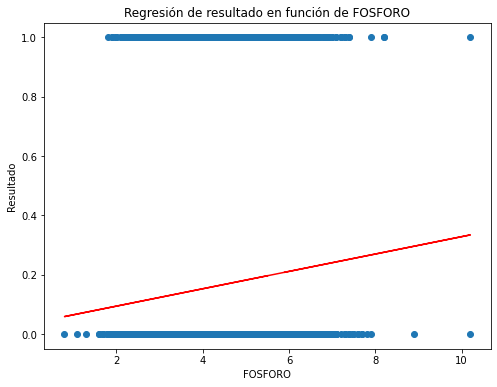

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data2['FOSFORO'], data2['resultado'], "o", label="data2")
ax.plot(data2['FOSFORO'], params5['Intercept']+params5['FOSFORO']*data2['FOSFORO']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("FOSFORO")
ax.set_title("Regresión de resultado en función de FOSFORO")

### El resultado más bajo de Vitamina D, definido como "insuficiente", está dado por 0. El resultado de la Vitamina D está correlacionado positivamente con los resultados de Fosforo en la muestra poblacional. Esto es, valores bajos de Vitamina D, están asociados también a baja concentración de Fósforo en el organismo.

### CALCIO

In [45]:
mod6 = smf.ols(formula='resultado ~ CALCIO', data=data2)
res6 = mod6.fit()
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:              resultado   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     691.5
Date:                Wed, 05 Oct 2022   Prob (F-statistic):          5.36e-152
Time:                        21:30:23   Log-Likelihood:                -49393.
No. Observations:              128030   AIC:                         9.879e+04
Df Residuals:                  128028   BIC:                         9.881e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3305      0.018    -18.069      0.0

In [46]:
params6 = res6.params
print(params6)

Intercept   -0.330487
CALCIO       0.050972
dtype: float64


Text(0.5, 1.0, 'Regresión de resultado en función de CALCIO')

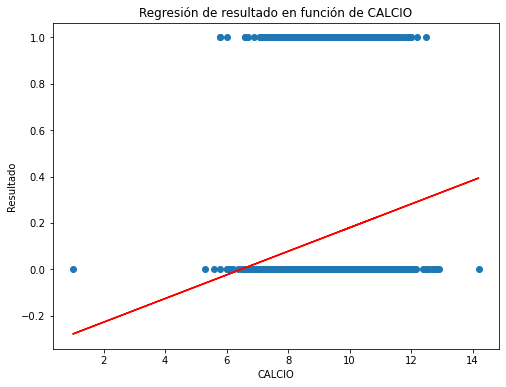

In [47]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(data2['CALCIO'], data2['resultado'], "o", label="data2")
ax.plot(data2['CALCIO'], params6['Intercept']+params6['CALCIO']*data2['CALCIO']  , "r-", label="Predicted")
ax.set_ylabel("Resultado")
ax.set_xlabel("CALCIO")
ax.set_title("Regresión de resultado en función de CALCIO")

### El calcio también presenta una correlación positiva con los resultados de Vitamina D de la muestra poblacional, esto en concordancia con la información científica que indica que en pacientes con bajos indices de vitamina D es altamente probable que también presenten baja concentración de Calcio y Fósforo en el organismo.

## Conclusiones parte I.
### De las variables analizadas, se pudo verificar que existe correlación con los resultados de la Vitamina D en las variables: Estación del año, Laboratorio (región del país), Año en que se toma la muestra (pre o durante pandemia), Fósforo y Calcio.

## PROBANDO MODELO DE REGRESIÓN LOGÍSTICA COMO PREDICTOR DE RESULTADO

## Crearemos un nuevo dataset con las variables que se encontró mayor relación con el resultado de Vitamina D para de esta manera analizar si es posible predecir un resultado considerando estos 5 factores.

In [48]:
data_LR = data2[['estación', 'region_lab', 'AÑO', 'FOSFORO', 'CALCIO', 'resultado']]
data_LR

,estación,region_lab,AÑO,FOSFORO,CALCIO,resultado
0,3,13,2018,5.5,10.9,0
2,3,13,2018,4.1,9.6,0
3,3,13,2018,4.3,9.6,0
8,3,13,2018,3.9,9.9,1
9,3,14,2018,5.0,9.6,0
...,...,...,...,...,...,...
212516,2,13,2021,4.2,9.4,0
212517,2,13,2021,3.4,9.0,0
212518,2,13,2021,3.4,9.3,0
212519,2,13,2021,4.5,9.6,1


In [49]:
data_LR[['FOSFORO','CALCIO']].describe()

,FOSFORO,CALCIO
count,128030.000000,128030.000000
mean,3.909296,9.421911
std,0.653953,0.513124
min,0.800000,1.000000
25%,3.500000,9.100000
50%,3.830000,9.400000
75%,4.300000,9.800000
max,10.200000,14.200000


In [50]:
X = data_LR.iloc[:,:-1]
X

,estación,region_lab,AÑO,FOSFORO,CALCIO
0,3,13,2018,5.5,10.9
2,3,13,2018,4.1,9.6
3,3,13,2018,4.3,9.6
8,3,13,2018,3.9,9.9
9,3,14,2018,5.0,9.6
...,...,...,...,...,...
212516,2,13,2021,4.2,9.4
212517,2,13,2021,3.4,9.0
212518,2,13,2021,3.4,9.3
212519,2,13,2021,4.5,9.6


In [51]:
y = data_LR.iloc[:, -1]
y

0         0
2         0
3         0
8         1
9         0
         ..
212516    0
212517    0
212518    0
212519    1
212523    0
Name: resultado, Length: 128030, dtype: int64

In [52]:
df = X.join(y, how='outer')
df

,estación,region_lab,AÑO,FOSFORO,CALCIO,resultado
0,3,13,2018,5.5,10.9,0
2,3,13,2018,4.1,9.6,0
3,3,13,2018,4.3,9.6,0
8,3,13,2018,3.9,9.9,1
9,3,14,2018,5.0,9.6,0
...,...,...,...,...,...,...
212516,2,13,2021,4.2,9.4,0
212517,2,13,2021,3.4,9.0,0
212518,2,13,2021,3.4,9.3,0
212519,2,13,2021,4.5,9.6,1


In [74]:
df2= df[df['region_lab']==13]
df2['resultado'].value_counts()

0    76408
1    14422
Name: resultado, dtype: int64

In [53]:
colors = {0:'Red', 1:'Blue'}
type_colors = df.resultado.map(colors)

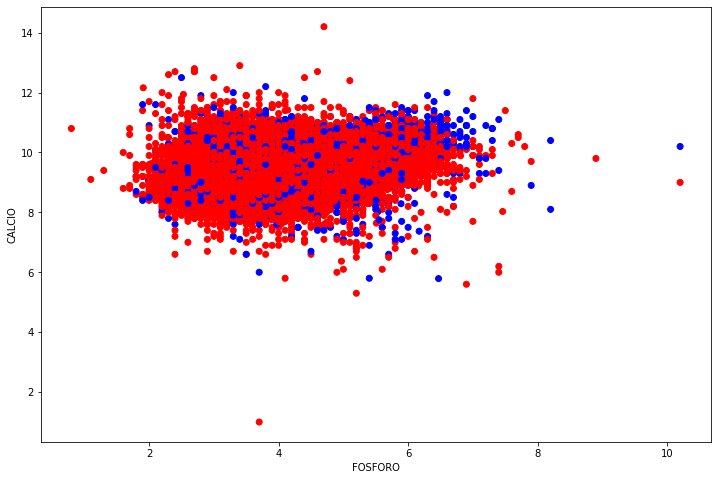

In [54]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.xlabel('FOSFORO')
plt.ylabel('CALCIO')
ax.scatter(df.FOSFORO,df.CALCIO, color =type_colors)
plt.show()

### El gráfico muestra una leve inclinación de resultados Deseables (Blue) hacia niveles más altos de Fósforo y Calcio.

In [98]:
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn. model_selection import cross_val_score
from sklearn. discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report

In [56]:
Insuficiente = df.resultado == 0
Deseable = df.resultado == 1

In [57]:
print(Insuficiente.sum())
print(Deseable.sum())
print(len(Insuficiente))

108855
19175
128030


In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=4)


In [80]:
clf_0 = LogisticRegression(random_state=0).fit(X_train, y_train)
#clf_1 = LogisticRegression(random_state=0).fit(X_train_1, y_train_1)

In [81]:
predicts_logC0 = clf_0.predict(X_test)
#predicts_logC1 = clf_1.predict(X_test_1)

In [82]:
clf_0.predict_proba(X_test)

array([[0.85302554, 0.14697446],
       [0.79921913, 0.20078087],
       [0.93342955, 0.06657045],
       ...,
       [0.76586035, 0.23413965],
       [0.84545039, 0.15454961],
       [0.88336557, 0.11663443]])

In [83]:
print('Matriz de confusión modelo logístico pertenece o no a la clase 0')
print(confusion_matrix(predicts_logC0,y_test))
#print('Matriz de confusión modelo logístico pertenece o no a la clase 1')
#print(confusion_matrix(predicts_logC1,y_test_1))

Matriz de confusión modelo logístico pertenece o no a la clase 0
[[43494  7717]
 [    1     0]]


In [84]:
from sklearn import metrics

In [110]:
accuracy_score(y_test, predicts_logC0)

0.8492931344216199

In [111]:
#metrics.roc_auc_score(y_test, predicts_logC0)

In [108]:
clf_0.predict_proba([[3,13,2018,5.5,10.9]])

array([[0.622, 0.378]])

In [100]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve 
from sklearn.preprocessing import normalize
from sklearn import datasets

# import warnings filter
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)

Logistic Regression - benign : 

cross validation score :  [0.8508 0.8508 0.8508 0.8508 0.8508 0.8508 0.8507 0.8508 0.8509 0.8509]
Average score :  0.8508292353779844

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     43495
           1       0.00      0.00      0.00      7717

    accuracy                           0.85     51212
   macro avg       0.42      0.50      0.46     51212
weighted avg       0.72      0.85      0.78     51212

Confusion Matrix


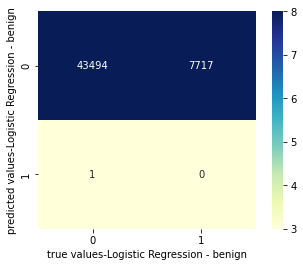

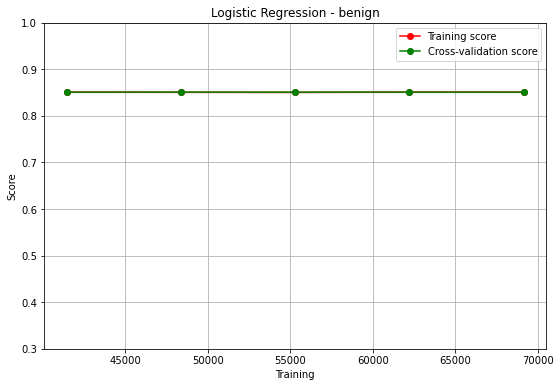

Logistic Regression - benign - Accuracy model : 84.93%
Logistic Regression - benign - Accuracy training set: 85.08%
Logistic Regression - benign - Accuracy test set: 84.93%


In [105]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.6, 1.0, 5)):

    plt.figure(figsize=(9, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    
    plt.show()


# Se define función general para trabajar con los modelo
def modelo(seed,size,tipo_modelo,txt_model,x,y,x_lim,y_lim):
  seed = seed
  scoring = 'accuracy'

  X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=size, random_state=seed)

  score = cross_val_score(tipo_modelo,X_train,Y_train,cv=10)

  print(txt_model + ' : \n')

  print('cross validation score : ',score)
  print('Average score : ',np.average(score))

  model = tipo_modelo
  
  model.fit(X_train, Y_train)
  predictions = model.predict(X_test)
  accuracy = accuracy_score(Y_test, predictions)
  
  print("\nClassification Report")
  print(classification_report(Y_test, predictions))

  print("Confusion Matrix")
  mat = confusion_matrix(Y_test, predictions)
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
  cmap="YlGnBu",vmin=3,vmax=8)
  plt.xlabel('true values-' + txt_model)
  plt.ylabel('predicted values-' + txt_model)
  plt.show()      
  plot_learning_curve(model, 
                        "{}".format(txt_model),
                        X_train,
                        Y_train,
                        ylim=(x_lim,y_lim),
                        cv=10) 

  print(txt_model + ' - Accuracy model : {:.2f}%'.format(accuracy*100))
  print(txt_model + ' - Accuracy training set: {:.2f}%'
     .format(model.score(X_train, Y_train)*100))
  print(txt_model + ' - Accuracy test set: {:.2f}%'
     .format(model.score(X_test, Y_test)*100))

  return model 
#m_gr = modelo(0,0.35,LinearDiscriminantAnalysis(),"Linear Discriminant Analysis",X,y,0.6,0.9) 
b_rl = modelo(4,0.4,LogisticRegression(),"Logistic Regression - benign",X,y,0.3,1)

In [106]:
r = [3,13,2018,5.5,10.9]
print(f'La predicción del modelo es : {b_rl.predict([r])}')
Px=b_rl.predict_proba([r])[0][0]
Py=b_rl.predict_proba([r])[0][1]
print(f'La probabilidad del modelo que sea 0 es : {round(Px*100,2)}%')
print(f'La probabilidad del modelo que sea 1 es : {round(Py*100,2)}%') 

La predicción del modelo es : [0]
La probabilidad del modelo que sea 0 es : 62.2%
La probabilidad del modelo que sea 1 es : 37.8%
